In [10]:
from pandas import read_csv
import numpy as np
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.ANNUAL   No. Observations:                 4115
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -30266.313
Method:                       css-mle   S.D. of innovations            378.457
Date:                Thu, 20 Aug 2020   AIC                          60546.626
Time:                        11:34:49   BIC                          60590.882
Sample:                             1   HQIC                         60562.291
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6274      2.138     -0.293      0.769      -4.818       3.564
ar.L1.D.ANNUAL    -0.6573      0.015    -42.530      0.000      -0.688      -0.627
ar.L2.D.ANNUAL    -0.4791      0.018

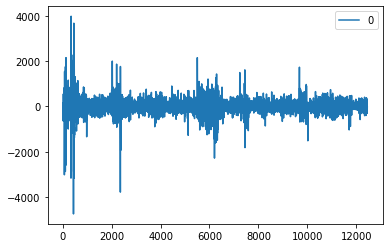

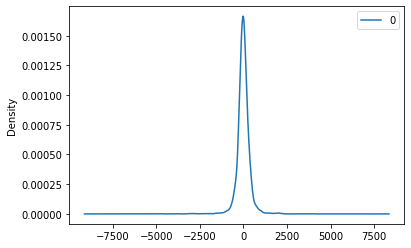

                 0
count  4115.000000
mean     -0.103360
std     378.522361
min   -4746.273550
25%    -159.164330
50%      -6.234169
75%     158.334462
max    3983.998263


In [11]:
cols=[1,2,15]
df = read_csv("climate_data.csv",usecols=cols)
df=df.fillna(0)
data=df[df.Parameter=='Actual']
series=data['ANNUAL']
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


In [13]:
X=series.values
size = int(len(X) * 0.95)
train, test = X[0:50], X[50:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=3069.590255, expected=3080.000000
predicted=3059.472424, expected=2507.200000
predicted=3045.521698, expected=2807.400000
predicted=2951.779866, expected=3343.300000
predicted=3133.179125, expected=3025.000000
predicted=2925.022392, expected=3938.200000
predicted=3210.187758, expected=2959.700000
predicted=3146.376209, expected=2981.700000
predicted=3040.947555, expected=3054.800000
predicted=3371.813826, expected=3163.800000
predicted=3076.363965, expected=2701.200000
predicted=3095.026049, expected=3216.400000
predicted=3026.147700, expected=2762.800000
predicted=2988.610757, expected=2619.000000
predicted=2785.244808, expected=3370.800000
predicted=3100.053012, expected=2998.600000
predicted=2892.237344, expected=3323.000000
predicted=3009.178280, expected=2991.100000
predicted=3098.316241, expected=2962.000000
predicted=2954.220078, expected=3085.700000
predicted=3177.936125, expected=3276.000000
predicted=3086.546235, expected=2388.200000
predicted=2924.897706, expected=

KeyboardInterrupt: 

In [9]:
len(X)

4116